# [Dacon_Basic 흡연 여부 예측 AI 경진대회](https://dacon.io/competitions/official/236147/overview/description)

- 평가산식 : Accuracy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv(os.getcwd() + '/data/smoke/train.csv')
display(df.head())
print(df.info())
print(df.shape)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB
None
(7000, 18)


In [3]:
df.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [4]:
df.isna().sum().sum()

0

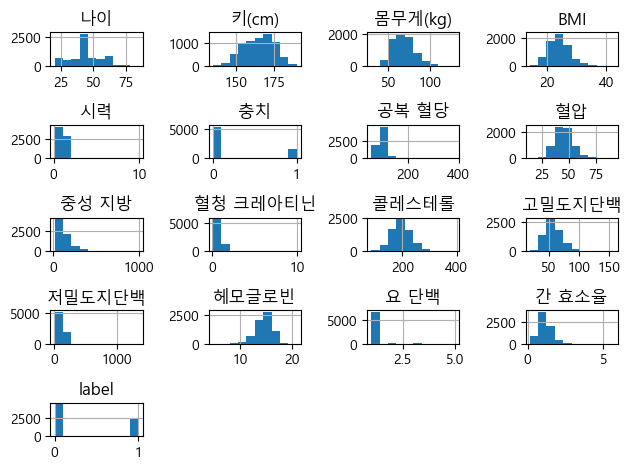

In [8]:
df.hist()
plt.tight_layout()
plt.show()

In [23]:
df.label.value_counts()

0    4429
1    2571
Name: label, dtype: int64

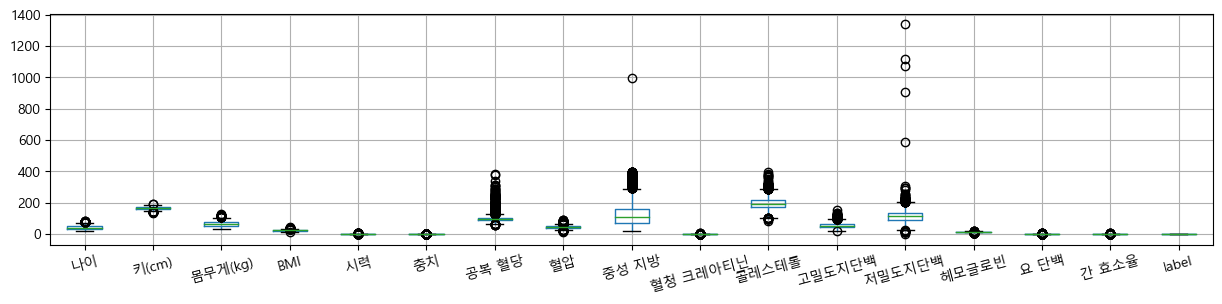

In [17]:
df.boxplot(figsize=(15,3))
plt.xticks(fontsize=10, rotation=15)
plt.show()

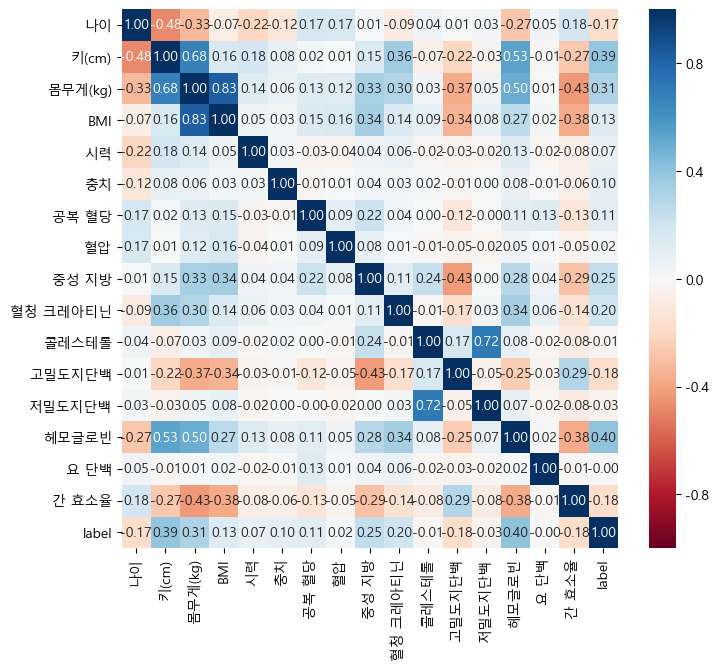

In [20]:
df_corr = df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='RdBu', fmt='.2f')
plt.show()

1. 결측치 존재 여부
    - 전체 데이터 셋의 결측치 존재 여부를 확인한 결과, train 데이터 셋에서 결측치는 존재하지 않았다.
1. 데이터 타입 구성
    - 종속변수인 label 컬럼은 int형으로 구성되어 있으며, 독립변수는 object, float, int형으로 구성되어 있다.
1. 종속변수와 독립변수 간의 상관성
    - 종속변수와 독립변수 간의 상관성을 히트맵으로 확인한 결과, 높은 상관관계를 보이는 변수는 존재하지 않았다.
1. 독립변수 간의 상관성
    - 독립변수 간의 상관성을 히트맵으로 확인한 결과, 다중공선성을 의심할 만큼(0.9 이상)의 관계는 보이지 않았다.
    - 다만 가장 높은 상관성을 보이는 관계는 BMI와 몸무게가 약 0.83의 양의 상관성을 보이는 것으로 확인했다. 또한 저밀도지단백과 콜레스테롤이 약 0.72의 양의 상관성을 보였다.
1. 주의할 점
    - 종속변수에 데이터 불균형 이슈가 우려되므로 모델을 구현하기 전에 오버 샘플링 및 언더 샘플링 기법을 통해 클래스 개수를 통일해야 할 것이다.
    - 독립변수의 스케일이 모두 다르기 때문에 스케일링을 통해서 값의 범위를 통일시킬 필요가 있을 것이다. 다만 트리 계열의 모델을 사용할 것우 스케일링은 필수 작업이 아니다.

## 통계 분석
### 1) 일표본 t-test(모분산 모름, 유의수준 0.05)
- 귀무가설: 평균 BMI는 21이다.
- 대립가설: 평균 BMI는 21이 아니다.

In [14]:
np.random.seed(1234)
sample = np.random.choice(df['BMI'], 23)
import scipy.stats as stats
stats.shapiro(sample) # 등분산 만족 못함
print(stats.wilcoxon(sample - 21)) # 귀무가설 기각
print('신뢰구산:', stats.t.interval(alpha=0.95, loc=np.mean(sample), df=len(sample)-1, scale=stats.sem(sample)))

WilcoxonResult(statistic=19.0, pvalue=7.319450378417969e-05)
신뢰구산: (21.87607085871076, 23.872624793463153)


### 2) 독립표본 t-test(모분산 모름, 유의수준 0.05)
- 귀무가설: 흡연 여부에 따라 평균 콜레스테롤에 차이가 없다.
- 대립가설: 흡연 여부에 따라 평균 콜레스테롤에 차이가 있다.

In [33]:
np.random.seed(1234)
yes = np.random.choice(df.loc[df['label']==1, '콜레스테롤'], 23)
no = np.random.choice(df.loc[df['label']==0, '콜레스테롤'], 27)
stats.shapiro(yes) # 정규성 만족
stats.shapiro(no) # 정규성 만족
stats.levene(yes, no) # 등분산성 만족
print(stats.ttest_ind(yes, no, equal_var = True)) # 귀무가설 채택

def sp(data1, data2):
    df = len(data1) + len(data2) - 2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/df)
    return sp
alpha=0.95
dof = len(yes) + len(no)-2
diff_mean = np.mean(yes) - np.mean(no)
s = sp(yes, no)*(1/len(yes) + 1/len(no))
ci = stats.t.interval(alpha, dof, loc=diff_mean, scale=s)
print('신뢰구간:', ci)

Ttest_indResult(statistic=0.42186152216879336, pvalue=0.6750095684144377)
신뢰구간: (-1.29348473486887, 9.251616779957445)


### 3) 교차분석
- 귀무가설: 충치와 흡연 여부 간에 연관성이 없다.
- 대립가설: 충치와 흡연 여부 간에 연관성이 있다.

In [46]:
tab = pd.crosstab(df['충치'], df['label'])
from scipy.stats import chi2_contingency
chi, p, dff, expects = chi2_contingency(tab)
print(f'검정통계량: {chi} / p-value: {p}') # 귀무가설 기각

검정통계량: 67.38566768794314 / p-value: 2.2326611038095596e-16


### 4) 이항 로지스틱 분석

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df1 = df.copy()
df1.drop('ID', axis=1, inplace=True)
df1.rename(columns={"중성 지방": "중성_지방", "혈청 크레아티닌": "혈청_크레아티닌", "공복 혈당": "공복_혈당","요 단백":"요_단백",
                  "간 효소율":"간_효소율", "키(cm)": "키", "몸무게(kg)": "몸무게"}, inplace=True)
model = smf.glm("label ~ 나이 + 키+몸무게+BMI+시력+충치+공복_혈당+혈압+중성_지방+혈청_크레아티닌+콜레스테롤+고밀도지단백+저밀도지단백+헤모글로빈+요_단백+간_효소율", 
                data=df1, family=sm.families.Binomial()).fit()
print(model.summary())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6983
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3639.9
Date:                Sat, 26 Aug 2023   Deviance:                       7279.7
Time:                        09:38:17   Pearson chi2:                 6.60e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2405
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.7815      4.222     -9.422      0.0

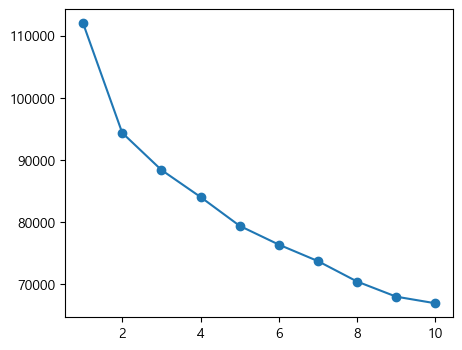

[112000.00000000033, 94363.43559793355, 88396.68147743786, 84042.08827568022, 79397.04824366102, 76377.49944305341, 73720.79194870536, 70434.77258046267, 67997.3766881035, 66933.43260087696]


In [13]:
# 비계층적 군집분석
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df1.drop('label', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    plt.figure(figsize=(5,4))
    plt.plot(range(1,11), sse, marker='o')
    plt.show()
    print(sse)

elbow(X_scaled)

## 머신러닝

In [65]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [45]:
# 스케일링
scaler = StandardScaler()
num_features = df1.drop(['충치', '요_단백', 'label'], axis=1).columns
num_df = pd.DataFrame(scaler.fit_transform(df1[num_features]), columns=num_features)
cate_df = df1[['충치', '요_단백', 'label']]
df2 = pd.concat([num_df, cate_df], axis=1)
df2.head(3)

# 데이터 분할
X = df2.drop('label', axis=1)
y = df2.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

# 오버샘플링
over = RandomOverSampler()
X_train_ro, y_train_ro = over.fit_resample(X_train, y_train)
print(pd.Series(y_train_ro).value_counts())

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_sm).value_counts())

# 언더샘플링
under = RandomUnderSampler()
X_train_ru, y_train_ru = under.fit_resample(X_train, y_train)
print(pd.Series(y_train_ru).value_counts())

1    3100
0    3100
dtype: int64
1    3100
0    3100
dtype: int64
1    1800
0    1800
dtype: int64


In [69]:
# 모델 객체 생성
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier(random_state=1234)
lgbm_clf = LGBMClassifier(random_state=1234)
rfr_clf = RandomForestClassifier(random_state=1234)
svc = SVC()

# 교차 검증
def crossVal(model):
    scores = cross_val_score(estimator=model, X=X_train_sm, y=y_train_sm, scoring='accuracy', cv=5, n_jobs=-1)
    print(f'### {model.__class__.__name__} ###')
    print('교차 검증 값: ', scores)
    print("평균 교차 검증 값: ", round(np.mean(scores),4))

for estimator in [knn_clf, lr_clf, svc, xgb_clf, lgbm_clf, rfr_clf]:
    crossVal(estimator)

### KNeighborsClassifier ###
교차 검증 값:  [0.72580645 0.72903226 0.73387097 0.79596774 0.78951613]
평균 교차 검증 값:  0.7548
### LogisticRegression ###
교차 검증 값:  [0.73064516 0.72822581 0.71048387 0.75241935 0.73870968]
평균 교차 검증 값:  0.7321
### SVC ###
교차 검증 값:  [0.73951613 0.74596774 0.74274194 0.7733871  0.77419355]
평균 교차 검증 값:  0.7552
### XGBClassifier ###
교차 검증 값:  [0.69274194 0.69193548 0.69677419 0.85806452 0.85564516]
평균 교차 검증 값:  0.759
### LGBMClassifier ###
교차 검증 값:  [0.72177419 0.71612903 0.71048387 0.84677419 0.83870968]
평균 교차 검증 값:  0.7668
### RandomForestClassifier ###
교차 검증 값:  [0.7483871  0.75483871 0.74516129 0.83387097 0.82580645]
평균 교차 검증 값:  0.7816


In [76]:
# 모델 학습, 예측, 평가
def make_model(model):
    start = time.time()
    model.fit(X_train_sm, y_train_sm)
    end = time.time()
    pred = model.predict(X_test)
    print(f'### {model.__class__.__name__} ###')
    print(classification_report(y_test, pred))
    print(f'time: {round(end-start, 4)} sec')
    print('')
    
for estimator in [knn_clf, lr_clf, svc, xgb_clf, lgbm_clf, rfr_clf]:
    make_model(estimator)

### KNeighborsClassifier ###
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1329
           1       0.56      0.76      0.64       771

    accuracy                           0.69      2100
   macro avg       0.69      0.70      0.69      2100
weighted avg       0.73      0.69      0.70      2100

time: 0.0589 sec

### LogisticRegression ###
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1329
           1       0.57      0.80      0.67       771

    accuracy                           0.71      2100
   macro avg       0.71      0.73      0.70      2100
weighted avg       0.75      0.71      0.71      2100

time: 0.0468 sec

### SVC ###
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1329
           1       0.56      0.86      0.68       771

    accuracy                           0.70      2100
   macro avg       0.72 

In [79]:
rfr_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=1234)

In [78]:
test = pd.read_csv(os.getcwd() + '/data/smoke/test.csv').drop('ID', axis=1)
display(test.head())
print(test.info())
print(test.shape)

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,40,165,55,20.20,0.90,1,98,47,75,0.5,229,59,155,13.7,1,1.73
1,65,145,50,23.78,0.50,0,99,59,98,0.6,200,65,115,12.2,1,1.00
2,40,160,75,29.30,1.00,0,105,34,232,0.6,170,50,73,15.1,1,1.33
3,30,180,90,27.78,1.35,0,78,45,218,0.9,197,55,98,15.2,1,0.89
4,50,155,55,22.89,0.75,0,116,67,139,1.0,230,66,136,15.0,1,0.85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        3000 non-null   int64  
 1   키(cm)     3000 non-null   int64  
 2   몸무게(kg)   3000 non-null   int64  
 3   BMI       3000 non-null   float64
 4   시력        3000 non-null   float64
 5   충치        3000 non-null   int64  
 6   공복 혈당     3000 non-null   int64  
 7   혈압        3000 non-null   int64  
 8   중성 지방     3000 non-null   int64  
 9   혈청 크레아티닌  3000 non-null   float64
 10  콜레스테롤     3000 non-null   int64  
 11  고밀도지단백    3000 non-null   int64  
 12  저밀도지단백    3000 non-null   int64  
 13  헤모글로빈     3000 non-null   float64
 14  요 단백      3000 non-null   int64  
 15  간 효소율     3000 non-null   float64
dtypes: float64(5), int64(11)
memory usage: 375.1 KB
None
(3000, 16)


In [85]:
# 스케일링
scaler = StandardScaler()
num_features = test.drop(['충치', '요 단백'], axis=1).columns
num_df = pd.DataFrame(scaler.fit_transform(test[num_features]), columns=num_features)
cate_df = test[['충치', '요 단백']]
test1 = pd.concat([num_df, cate_df], axis=1)
test1.head(3)

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,간 효소율,충치,요 단백
0,-0.372382,0.069539,-0.835591,-1.143675,-0.276329,-0.054058,0.183970,-0.734061,-1.785419,0.898841,0.097545,1.090302,-0.580429,1.104100,1,1
1,1.655841,-2.126423,-1.235651,-0.094886,-1.346333,-0.004539,1.514411,-0.412360,-1.326914,0.076557,0.503135,0.005181,-1.532333,-0.289532,0,1
2,-0.372382,-0.479452,0.764647,1.522241,-0.008828,0.292573,-1.257340,1.461897,-1.326914,-0.774081,-0.510841,-1.134195,0.308015,0.340466,0,1


In [87]:
y_pred = rfr_clf.predict(test1)
pd.Series(y_pred).value_counts()

1    1801
0    1199
dtype: int64

In [92]:
submission = pd.read_csv(os.getcwd() + '/data/smoke/sample_submission.csv')
submission['label'] = y_pred
submission.head(3)
submission.to_csv(os.getcwd() + '/data/smoke/result.csv', index=False)

### 앙상블 모델의 인풋 데이터를 스케일링 하지 않고 학습시켜보기